# Data loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df.dropna(subset=['RainToday','RainTomorrow'],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

<Axes: xlabel='Date', ylabel='count'>

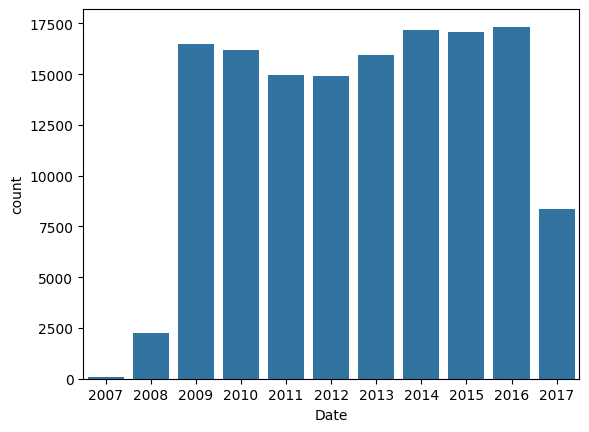

In [ ]:
sns.countplot(x=pd.to_datetime(df.Date).dt.year)

# Train,Validation and test sets splitting


In [ ]:
from sklearn.model_selection import train_test_split
train_val_df,test_df=train_test_split(df,test_size=0.2,random_state=42)
train_df,val_df=train_test_split(train_val_df,test_size=0.25,random_state=42)
train_df.shape,val_df.shape,test_df.shape

((84471, 23), (28158, 23), (28158, 23))

In [ ]:
year=pd.to_datetime(df.Date).dt.year
train_df=df[year<2015]
val_df=df[year==2015]
test_df=df[year>2015]
train_df.shape,val_df.shape,test_df.shape

((97988, 23), (17089, 23), (25710, 23))

In [ ]:
inputs=list(df.columns)[1:-1]
target='RainTomorrow'

In [ ]:
train_inputs=train_df[inputs]
train_targets=train_df[target]
val_inputs=val_df[inputs]
val_targets=val_df[target]
test_inputs=test_df[inputs]
test_targets=test_df[target]

In [ ]:
num_cols=train_inputs.select_dtypes(np.number).columns.tolist()
cat_cols=train_inputs.select_dtypes('object').columns.tolist()

In [ ]:
train_inputs[num_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,97674.000000,97801.000000,97988.000000,61657.000000,57942.000000,91160.000000,97114.000000,96919.000000,96936.000000,96872.000000,88876.000000,88857.000000,63000.000000,61966.000000,97414.000000,97392.000000
mean,12.007831,23.022202,2.372935,5.289991,7.609004,40.215873,14.092263,18.764608,68.628745,51.469547,1017.513734,1015.132352,4.302952,4.410677,16.835126,21.540138
std,6.347175,6.984397,8.518819,3.952010,3.788813,13.697967,8.984203,8.872398,19.003097,20.756113,7.072510,6.997072,2.866634,2.693370,6.404586,6.831612
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,979.000000,0.000000,0.000000,-5.900000,-5.100000
25%,7.500000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.800000,1010.400000,1.000000,2.000000,12.200000,16.600000
50%,11.800000,22.400000,0.000000,4.600000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.500000,1015.100000,5.000000,5.000000,16.600000,20.900000
75%,16.600000,27.900000,0.800000,7.200000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.300000,1019.900000,7.000000,7.000000,21.400000,26.200000
max,33.900000,48.100000,371.000000,82.400000,14.300000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.100000


In [ ]:
train_inputs[cat_cols].nunique()

,0
Location,49
WindGustDir,16
WindDir9am,16
WindDir3pm,16
RainToday,2


# Imputing numeric columns

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
imputer.fit(df[num_cols])

SimpleImputer()

In [ ]:
train_inputs[num_cols]=imputer.transform(train_inputs[num_cols])
val_inputs[num_cols]=imputer.transform(val_inputs[num_cols])
test_inputs[num_cols]=imputer.transform(test_inputs[num_cols])

<ipython-input-17-4433d4873c58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs[num_cols]=imputer.transform(train_inputs[num_cols])
<ipython-input-17-4433d4873c58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_inputs[num_cols]=imputer.transform(val_inputs[num_cols])
<ipython-input-17-4433d4873c58>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

# Scaling categorical columns

In [ ]:
 from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()
scaler.fit(df[num_cols])

MinMaxScaler()

In [ ]:
train_inputs[num_cols]=scaler.transform(train_inputs[num_cols])
val_inputs[num_cols]=scaler.transform(val_inputs[num_cols])
test_inputs[num_cols]=scaler.transform(test_inputs[num_cols])

<ipython-input-20-acd752b23713>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs[num_cols]=scaler.transform(train_inputs[num_cols])
<ipython-input-20-acd752b23713>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_inputs[num_cols]=scaler.transform(val_inputs[num_cols])
<ipython-input-20-acd752b23713>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [ ]:
train_inputs[num_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000
mean,0.483689,0.525947,0.006396,0.036949,0.525366,0.265107,0.108395,0.215668,0.686309,0.514693,0.612014,0.608705,0.483192,0.493693,0.507089,0.517103
std,0.149458,0.131904,0.022962,0.021628,0.200931,0.102420,0.068800,0.101424,0.189008,0.206376,0.111335,0.106611,0.255486,0.238028,0.134722,0.130726
min,0.000000,0.013233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030400,0.000000,0.000000,0.027426,0.005758
25%,0.377358,0.429112,0.000000,0.026207,0.517241,0.193798,0.053846,0.149425,0.570000,0.370000,0.543802,0.540800,0.333333,0.333333,0.409283,0.422265
50%,0.478774,0.514178,0.000000,0.037741,0.526244,0.255814,0.100000,0.218391,0.690000,0.520000,0.614125,0.610527,0.492351,0.499917,0.502110,0.506718
75%,0.591981,0.618147,0.002156,0.038621,0.634483,0.310078,0.146154,0.275862,0.830000,0.650000,0.682645,0.675200,0.666667,0.666667,0.601266,0.604607
max,1.000000,1.000000,1.000000,0.568276,0.986207,1.000000,0.669231,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988484


In [ ]:
scaler.data_min_

array([ -8.5,  -4.8,   0. ,   0. ,   0. ,   6. ,   0. ,   0. ,   0. ,
         0. , 980.5, 977.1,   0. ,   0. ,  -7.2,  -5.4])

In [ ]:
scaler.data_max_

array([  33.9,   48.1,  371. ,  145. ,   14.5,  135. ,  130. ,   87. ,
        100. ,  100. , 1041. , 1039.6,    9. ,    9. ,   40.2,   46.7])

In [ ]:
cat_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

# Encoding Categorical columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df2=df[cat_cols].fillna('Unknown')

In [ ]:
enc=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
enc.fit(df2)

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [ ]:
encoded_cols = list(enc.get_feature_names_out(cat_cols))


In [ ]:
cat_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [ ]:
train_inputs[cat_cols] = train_inputs[cat_cols].astype(str)
val_inputs[cat_cols] = val_inputs[cat_cols].astype(str)
test_inputs[cat_cols] = test_inputs[cat_cols].astype(str)

In [ ]:
train_inputs[encoded_cols]=enc.transform(train_inputs[cat_cols].fillna('Unknown'))
val_inputs[encoded_cols]=enc.transform(val_inputs[cat_cols].fillna('Unknown'))
test_inputs[encoded_cols]=enc.transform(test_inputs[cat_cols].fillna('Unknown'))

In [ ]:
test_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_Unknown,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
2498,Albury,0.681604,0.801512,0.000000,0.037741,0.526244,ENE,0.372093,nan,ESE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2499,Albury,0.693396,0.725898,0.001078,0.037741,0.526244,SSE,0.341085,SSE,SE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2500,Albury,0.634434,0.527410,0.005930,0.037741,0.526244,ENE,0.325581,ESE,ENE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2501,Albury,0.608491,0.538752,0.042049,0.037741,0.526244,SSE,0.255814,SE,SSE,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2502,Albury,0.566038,0.523629,0.018329,0.037741,0.526244,ENE,0.193798,SE,SSE,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,0.283019,0.502836,0.000000,0.037741,0.526244,E,0.193798,ESE,E,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145455,Uluru,0.266509,0.533081,0.000000,0.037741,0.526244,E,0.193798,SE,ENE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145456,Uluru,0.285377,0.568998,0.000000,0.037741,0.526244,NNW,0.124031,SE,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145457,Uluru,0.327830,0.599244,0.000000,0.037741,0.526244,N,0.240310,SE,WNW,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
pip install pyarrow

In [ ]:
train_inputs.to_parquet('train_inputs.parquet')
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
val_inputs.to_parquet('val_inputs.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
test_inputs.to_parquet('test_inputs.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

In [ ]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (97988, 123)
train_targets: (97988,)
val_inputs: (17089, 123)
val_targets: (17089,)
test_inputs: (25710, 123)
test_targets: (25710,)


In [ ]:
print(enc.categories_)

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
       'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
       'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
       'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
       'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
       'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
       'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
       'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
       'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
       'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
      dtype=object), array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'Unknown', 'W', 'WNW', 'WSW'], dtype=object), array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'Unknown', 'W', 'WNW', 'WSW'], dtype=object), array

# Training logistic regression model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression(solver='liblinear')

In [ ]:
model.fit(train_inputs[num_cols+encoded_cols],train_targets)

LogisticRegression(solver='liblinear')

In [ ]:
weight_df=pd.DataFrame( {'feature':(num_cols+encoded_cols), 'weight':model.coef_.tolist()[0] } )
weight_df

,feature,weight
0,MinTemp,0.894464
1,MaxTemp,-2.883748
2,Rainfall,3.167080
3,Evaporation,0.875492
4,Sunshine,-1.671192
...,...,...
113,WindDir3pm_W,-0.248827
114,WindDir3pm_WNW,-0.101626
115,WindDir3pm_WSW,-0.344103
116,RainToday_No,-1.507548


# Higher priority columns

<Axes: xlabel='weight', ylabel='feature'>

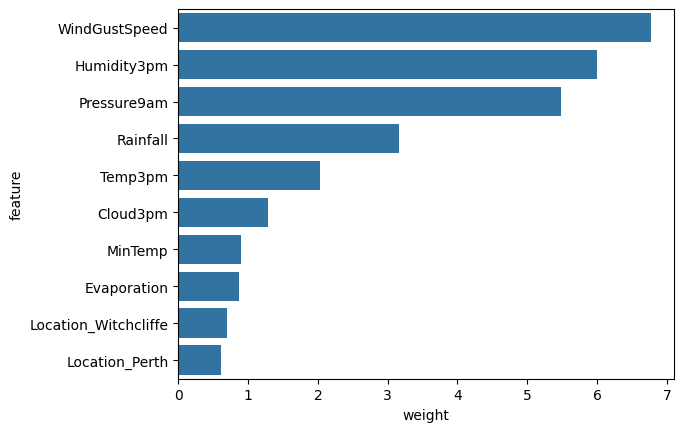

In [ ]:
sns.barplot(weight_df.sort_values('weight',ascending=False).head(10),x='weight',y='feature')

# X Train,Test and val

In [ ]:
X_train=train_inputs[num_cols+encoded_cols]
X_val=val_inputs[num_cols+encoded_cols]
X_test=test_inputs[num_cols+encoded_cols]

In [ ]:
train_pred=model.predict(X_train)
train_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

# Actual VS Predicted

In [ ]:
pd.DataFrame({"prediction":train_pred,'actual':train_targets})

,prediction,actual
0,No,No
1,No,No
2,No,No
3,No,No
4,No,No
...,...,...
144548,No,No
144549,No,No
144550,No,No
144551,No,No


In [ ]:
model.predict_proba(X_train)
model.classes_

array(['No', 'Yes'], dtype=object)

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
accuracy=accuracy_score(train_targets,train_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 85.20%


In [ ]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds

Accuracy: 85.20%


array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

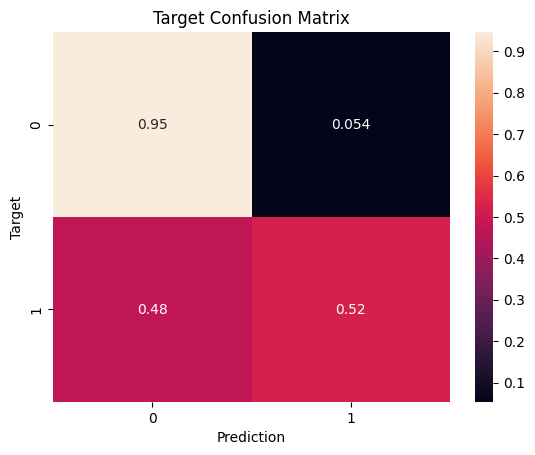

In [ ]:
predict_and_plot(X_train,train_targets,'Target')

Accuracy: 85.41%


array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

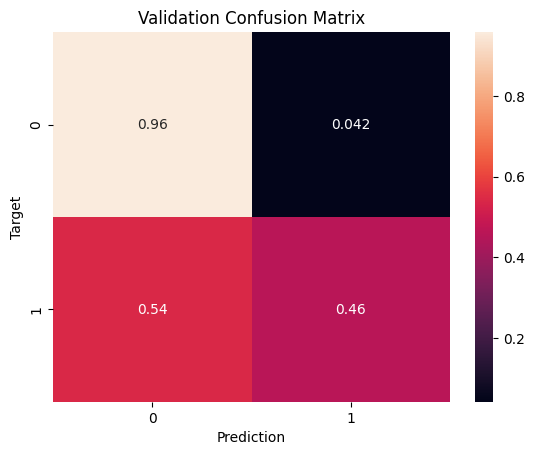

In [ ]:
predict_and_plot(X_val,val_targets,'Validation')

Accuracy: 84.20%


array(['No', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

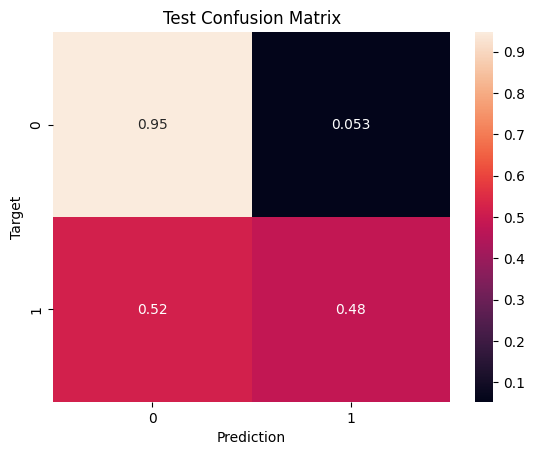

In [ ]:
predict_and_plot(X_test,test_targets,'Test')

# Dummy models

In [ ]:
def random_pred(input):
  return np.random.choice(["No",'Yes'],len(input))
def all_no(input):
  return np.full(len(input),"No")

In [ ]:
accuracy_score(test_targets,random_pred(X_test))

0.49914430182808245

In [ ]:
accuracy_score(test_targets,all_no(X_test))

0.7734344612991054

# Implementing with new input

In [ ]:
new_input = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 25.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [ ]:
ni_df=pd.DataFrame([new_input])

In [ ]:
ni_df[num_cols]=imputer.transform(ni_df[num_cols])
ni_df[num_cols]=scaler.transform(ni_df[num_cols])
ni_df[encoded_cols]=enc.transform(ni_df[cat_cols])
ni_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_Unknown,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,2021-06-19,Katherine,0.218105,0.104316,0.000074,0.0002,0.036293,NNW,-0.04537,NW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X_ni=ni_df[num_cols+encoded_cols]

In [ ]:
model.predict(X_ni)[0]

'No'

In [ ]:
model.predict_proba(X_ni)[0]

array([0.79252489, 0.20747511])

# Joblib

In [ ]:
import joblib

In [ ]:
aussie_rain = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': enc,
    'input_cols': inputs,
    'target_col': target,
    'numeric_cols': num_cols,
    'categorical_cols': cat_cols,
    'encoded_cols': encoded_cols
}

In [ ]:
joblib.dump(aussie_rain,'aussie_rain.joblib')

['aussie_rain.joblib']

In [ ]:
aussie_rain2 = joblib.load('aussie_rain.joblib')

In [ ]:
aussie_rain2['model']

LogisticRegression(solver='liblinear')

In [ ]:
import pandas as pd

def predict_input(single_input):
    # Convert single input dictionary to DataFrame
    input_df = pd.DataFrame([single_input])

    # Ensure numeric columns are properly transformed
    input_df[num_cols] = imputer.transform(input_df[num_cols])
    input_df[num_cols] = scaler.transform(input_df[num_cols])

    # Encode categorical columns
    encoded_array = enc.transform(input_df[cat_cols])
    encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols, index=input_df.index)
    input_df = pd.concat([input_df[num_cols], encoded_df], axis=1)

    # Make predictions
    X_input = input_df
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][model.classes_ == pred][0]  # Optimized indexing

    return pred, prob



In [ ]:
predict_input(new_input)

('No', np.float64(0.7925248878432747))